# Kailash Neupane, 3145549

In [1]:
from glob import glob
import random
import shutil
import os

In [2]:
main_folder = "D:/ml_data/face_mask_detection/dataset/all"
#dataset collected from kaggle and data-flair

In [3]:
with_mask_dir = main_folder + '/with_mask'
without_mask_dir = main_folder + '/without_mask'

In [4]:
with_mask_list = glob(with_mask_dir + "/*")
with_mask_count = len(with_mask_list)
with_mask_count

6638

In [5]:
without_mask_list = glob(without_mask_dir + "/*")
without_mask_count = len(without_mask_list)
without_mask_count

6638

In [6]:
train_count = 5310
test_count = 1328

In [7]:
with_mask_initial = random.sample(with_mask_list, (train_count + test_count))
without_mask_initial = random.sample(without_mask_list, (train_count + test_count))

In [8]:
test_with_mask = random.sample(with_mask_initial, (test_count))
test_without_mask = random.sample(without_mask_initial, (test_count))

In [9]:
train_with_mask = list(set(with_mask_initial) - set(test_with_mask))
train_without_mask = list(set(without_mask_initial) - set(test_without_mask))

In [10]:
shutil.rmtree(f'{main_folder}Test/', ignore_errors=True)
shutil.rmtree(f'{main_folder}Train/', ignore_errors=True)

In [11]:
os.makedirs(f'{main_folder}Test/with_mask/', exist_ok=True)
i = 0
for f in test_with_mask:
    i += 1
    shutil.copyfile(f, f'{main_folder}Test/with_mask/with_mask_{i}.jpg')

In [12]:
os.makedirs(f'{main_folder}Test/without_mask/', exist_ok=True)
i = 0
for f in test_without_mask:
    i += 1
    shutil.copyfile(f, f'{main_folder}Test/without_mask/without_mask_{i}.jpg')

In [13]:
os.makedirs(f'{main_folder}Train/with_mask/', exist_ok=True)
i = 0
for f in train_with_mask:
    i += 1
    shutil.copyfile(f, f'{main_folder}Train/with_mask/with_mask_{i}.jpg')

In [14]:
os.makedirs(f'{main_folder}Train/without_mask/', exist_ok=True)
i = 0
for f in train_without_mask:
    i += 1
    shutil.copyfile(f, f'{main_folder}Train/without_mask/without_mask_{i}.jpg')

In [15]:
# file copying done

In [16]:
train_imgs = glob(main_folder+"Train/*")
test_imgs = glob(main_folder+"Test/*")
train_dir = 'D:/ml_data/face_mask_detection/dataset/allTrain/'
test_dir = 'D:/ml_data/face_mask_detection/dataset/allTest/'

In [17]:
%matplotlib inline
from matplotlib.image import imread
from matplotlib import pyplot as plt
import random

def display_images(path_list, limit=None):
    i = -1
    plt.figure(figsize=(11, 11))
    for filename in path_list[:limit]:
        i = i + 1
        plt.subplot(330 + 1 + i)
        image = imread(filename)
        plt.imshow(image)
    plt.show()

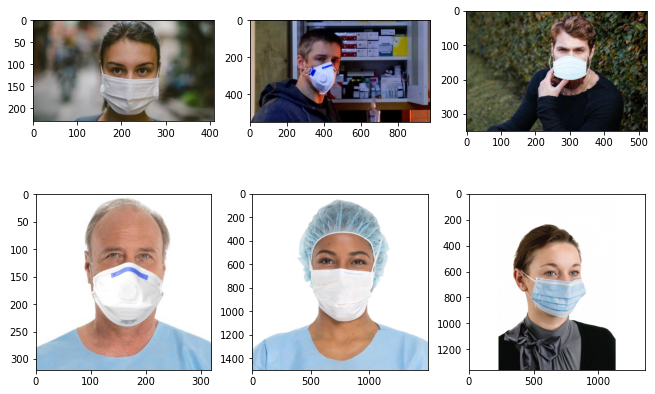

In [18]:
display_images(with_mask_list,6)

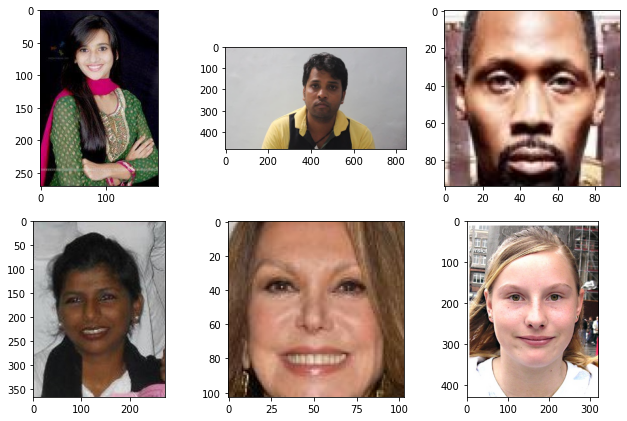

In [19]:
display_images(without_mask_list,6)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    target_size=(150, 150))
validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                              batch_size=10,
                                                              target_size=(150, 150))

Found 10620 images belonging to 2 classes.
Found 2656 images belonging to 2 classes.


In [22]:
label_map = (train_generator.class_indices)
label_map

{'with_mask': 0, 'without_mask': 1}

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import pandas as pd

In [24]:
import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [26]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
1062/1062 [==============================] - 119s 104ms/step - loss: 0.2949 - accuracy: 0.8854 - val_loss: 0.2109 - val_accuracy: 0.9191
Epoch 2/20
1062/1062 [==============================] - 61s 58ms/step - loss: 0.2326 - accuracy: 0.9126 - val_loss: 0.1231 - val_accuracy: 0.9616
Epoch 3/20
1062/1062 [==============================] - 60s 57ms/step - loss: 0.2126 - accuracy: 0.9203 - val_loss: 0.2246 - val_accuracy: 0.9206
Epoch 4/20
1062/1062 [==============================] - 62s 59ms/step - loss: 0.2011 - accuracy: 0.9284 - val_loss: 0.1571 - val_accuracy: 0.9462
Epoch 5/20
1062/1062 [==============================] - 61s 57ms/step - loss: 0.1918 - accuracy: 0.9301 - val_loss: 0.1398 - val_accuracy: 0.9571
Epoch 6/20
1062/1062 [==============================] - 63s 59ms/step - loss: 0.1806 - accuracy: 0.9328 - val_loss: 0.1155 - val_accuracy: 0.9631
Epoch 7/20
1062/1062 [==============================] - 62s 59ms/step - loss: 0.1702 - accuracy: 0.9383 - val_loss: 0.1018

In [27]:
summary = pd.DataFrame(history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.294945,0.885405,0.210933,0.919051
1,0.232634,0.912618,0.123052,0.961596
2,0.212551,0.920339,0.224574,0.920557
3,0.201094,0.928437,0.157128,0.946160
4,0.191754,0.930132,0.139791,0.957078
5,0.180618,0.932768,0.115482,0.963102
6,0.170239,0.938324,0.101782,0.968750
7,0.167210,0.940019,0.138642,0.952937
8,0.159408,0.943409,0.077983,0.975151
9,0.148992,0.948776,0.089961,0.971009


## epoch vs accuracy

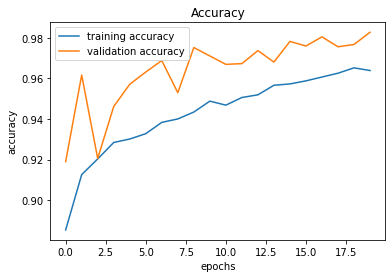

In [28]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## epoch vs loss

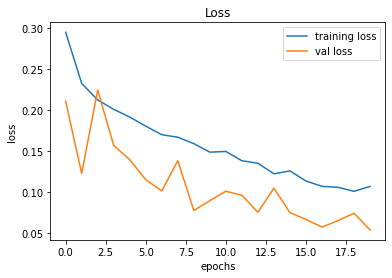

In [29]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## saving CNN model

In [30]:
model.save('model.h5')

# Loading Model and running the project

In [2]:
import cv2
import numpy as np
from keras.models import load_model

model = load_model("model.h5")

1/1 [==============================] - 1s 1s/step
[[1. 0.]]


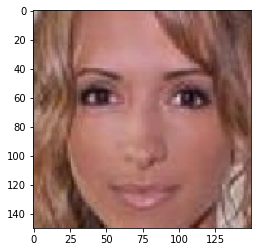

In [3]:
from keras.utils import load_img
import matplotlib.pyplot as plt

input_img = "D:\\ml_data\\face_mask_detection\\dataset\\allTest\\without_mask\\without_mask_202.jpg"
photo = load_img(input_img,target_size=(150,150))
n = np.array(photo)
reshaped = n.reshape(1, 150, 150, 3)
# reshaped = np.vstack([reshaped])
pred = model.predict(reshaped)
print(pred)
plt.imshow(photo)

In [4]:
import requests

face_classifier_xml_url = 'https://raw.githubusercontent.com/kipr/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'

with open('haarcascade_frontalface_default.xml', "wb") as file:
        response = requests.get(face_classifier_xml_url)
        file.write(response.content)

In [5]:
haarcascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

results = {0: 'without mask', 1: 'with mask'}
GR_dict = {0: (0, 0, 255), 1: (0, 255, 0)}
rect_size = 4
cap = cv2.VideoCapture(0)

while True:
    (rval, im) = cap.read()
    im = cv2.flip(im, 1, 1)

    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f]

        face_img = im[y:y + h, x:x + w]
        rerect_sized = cv2.resize(face_img, (150, 150))
        normalized = rerect_sized / 255.0
        reshaped = np.reshape(normalized, (1, 150, 150, 3))
        reshaped = np.vstack([reshaped])
        result = model.predict(reshaped)

        label = np.argmax(result, axis=1)[0]

        cv2.rectangle(im, (x, y), (x + w, y + h), GR_dict[label], 2)
        cv2.rectangle(im, (x, y - 40), (x + w, y), GR_dict[label], -1)
        cv2.putText(im, results[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
    cv2.imshow('LIVE', im)
    key = cv2.waitKey(10)

    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 21ms/step
